[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 50
    # data points      = 200
    # variables        = 4
    chi-square         = 0.582
    reduced chi-square = 0.003
    Akaike info crit   = -1159.937
    Bayesian info crit = -1146.743
[[Variables]]
    c1:       1.44748444 +/- 0.012398 (0.86%) (init= 1.468)
    sigma1:   1.03560768 +/- 0.001783 (0.17%) (init= 1.03)
    c2:       5.2475e-05 +/- 2.05e-06 (3.92%) (init= 0.0001)
    sigma2:   11.4984673 +/- 0.333810 (2.90%) (init= 5)
[[Correlations]] (unreported correlations are <  0.100)
    C(c2, sigma2)                = -0.976 
    C(c1, sigma1)                = -0.905 



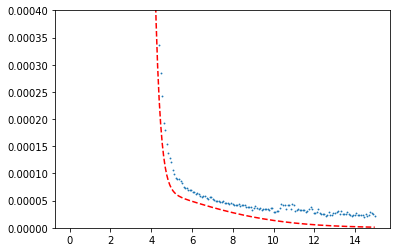

In [122]:
from numpy import sqrt, pi, exp
from lmfit import  Model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data2 = pd.read_csv('Downloads/dose_r2.dat',names=['Promien','Dawka','odchylenie'],sep=' ')
x = data2["Promien"]
y = data2["Dawka"]

def gaussian(x, c1, sigma1, c2, sigma2):
    return (x**4)*( c1 * np.exp( - (x )**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x)**2.0 / (2.0 * sigma2**2.0) ))

gmodel = Model(gaussian)
result = gmodel.fit(y*(x**4), x=x,c1=1.468,sigma1=1.03,c2=0.0001,sigma2=5)

#{\displaystyle f_{\mu ,\sigma }(x)={1 \over \sigma {\sqrt {2\pi }}}\,\exp \left({\frac {-(x-\mu )^{2}}{2\sigma ^{2}}}\right)}

plt.ylim(((0,0.0004)))
#plt.yscale('log')
#plt.xlim(5,15)
print(result.fit_report())

plt.scatter(x, y, s=0.7)
plt.plot(x, result.init_fit/(x**4), 'r--')

plt.show()
plt.savefig('result.init_fit.jpg')

/home/kinga/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


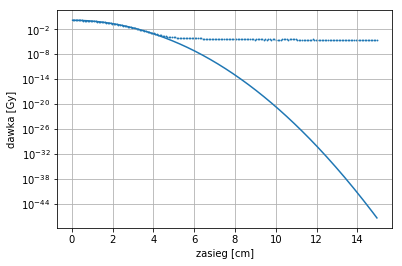

In [5]:
from sklearn import mixture
from pylab import *
import matplotlib.mlab
from scipy.optimize import leastsq

data2 = pd.read_csv('Downloads/dose_r2.dat',names=['Promien','Dawka','odchylenie'],sep=' ')
x = data2["Promien"]
y = data2["Dawka"]


%matplotlib inline

def double_gaussian( x, params ):
    (c1, mu1, sigma1, c2, mu2, sigma2) = params
    res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) )
    return res

def double_gaussian_fit( params ):
    fit = double_gaussian( x, params )
    return (fit - y)

# Remove background.
#y_proc = np.copy(y)
#y_proc[y_proc < 0.000001] = 0.0

# Least squares fit. Starting values found by inspection.
fit = leastsq( double_gaussian_fit, [1.5,0,0.7,0.00005,10,2] )
plt.scatter( x, y,s=0.7)

plt.xlabel("zasieg [cm]")
plt.ylabel("dawka [Gy]")
plt.grid(True)
plt.yscale('log')
#plt.ylim(((0,0.0004)))
plot( x, double_gaussian( x, fit[0] ) )

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 415
    # data points      = 200
    # variables        = 6
    chi-square         = 2.781
    reduced chi-square = 0.014
    Akaike info crit   = -843.113
    Bayesian info crit = -823.323
[[Variables]]
    amp:    1.47999999 +/- 0.150024 (10.14%) (init= 1.46)
    cen:    0.51828576 +/- 0.026342 (5.08%) (init= 0)
    wid:    0.48268105 +/- 0.029028 (6.01%) (init= 1)
    amp2:   5.0000e-05 +/- 5.35e-10 (0.00%) (init= 5e-05)
    cen2:   9.81792775 +/- 4.66e+04 (475086.94%) (init= 10)
    wid2:  -37.7049582 +/- 2.60e+06 (6905332.05%) (init= 5)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  = -0.787 
    C(cen, wid)                  = -0.474 
    C(amp, cen)                  =  0.455 
    C(amp2, wid2)                =  0.259 
    C(amp2, cen2)                =  0.207 



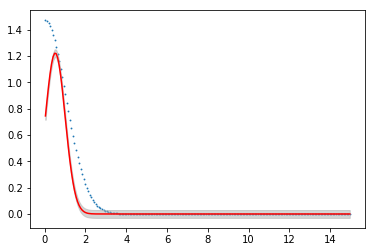

In [131]:
from lmfit import Model

def gaussian(x, amp, cen, wid,amp2,cen2,wid2):
    "2-d gaussian: gaussian"
    return (amp/(sqrt(2*pi)*wid)) * exp(-(x-cen)**2 /(2*wid**2))+(amp2/(sqrt(2*pi)*wid2)) * exp(-(x-cen2)**2 /(2*wid**2))

model = Model(gaussian) 
model.set_param_hint('amp',min=1.4, max=1.48)
model.set_param_hint('amp2',min=0.00003,max=0.00005)
parameters  = model.make_params( amp=1.46, cen=0, wid=1, amp2=0.00005, cen2=10,wid2=5)

result = model.fit(y, parameters, x=x)

print(result.fit_report())
#plt.yscale('log')
#plt.ylim(((0,0.0004)))
plt.scatter(x, y, s=0.7)
plt.plot(x, result.best_fit, 'r-')
plt.fill_between(x, result.best_fit-0.03, result.best_fit+0.03, color="#ABABAB",alpha=0.5)
plt.show()

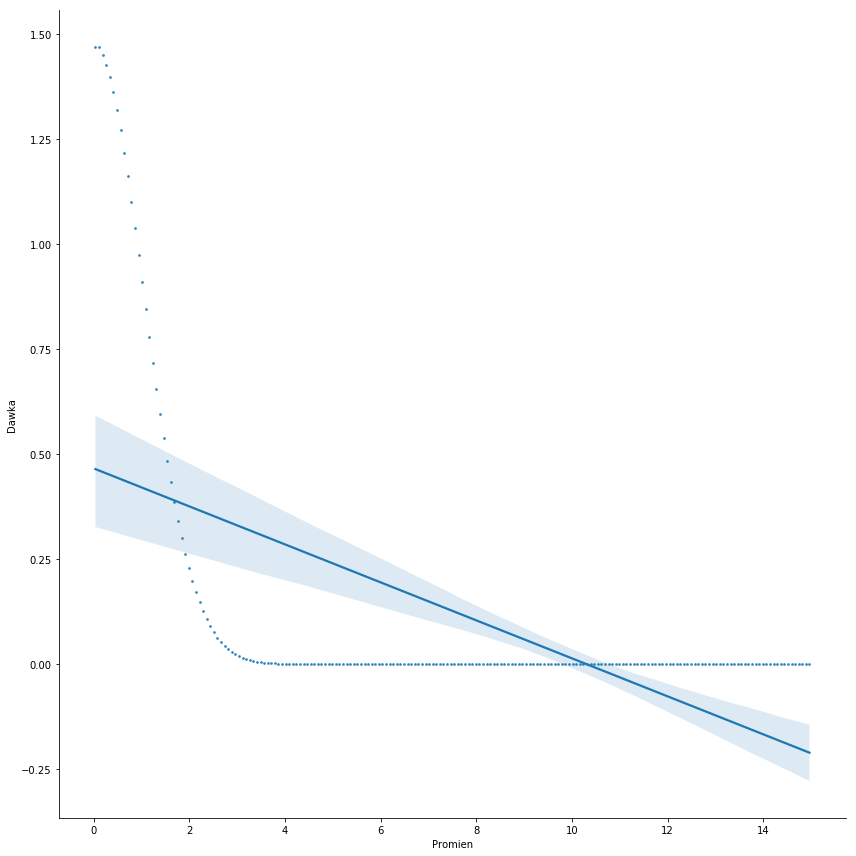

In [162]:
import seaborn as sns
data2 = pd.read_csv('Downloads/dose_r2.dat',names=['Promien','Dawka','odchylenie'],sep=' ')


sns.lmplot(x='Promien',y='Dawka', data=data2,size=12, truncate=True, scatter_kws={"s": 3})
plt.show()